In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import warnings
warnings.filterwarnings("ignore")
plt.ion()

In [2]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

In [18]:
n = 51
img_name = landmarks_frame.iloc[n,0]
landmarks = landmarks_frame.iloc[n,1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1,2)
print('Image name:{}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name:3718903026_c1bf5dfcf8.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 125.  220.]
 [ 124.  245.]
 [ 123.  269.]
 [ 125.  295.]]


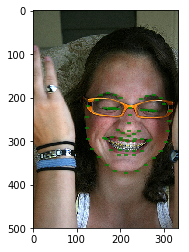

In [19]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:,0], landmarks[:,1], s=10, marker='_', c='g')
    plt.pause(0.002)
plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)), landmarks)
plt.show()

In [22]:
class FaceLandmarkDataset():
    def __init__(self, csv_file, root_dir, transform=None):
        self.landmarks_frame = pd.read_csv(csv_file) 
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix()
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image':image, 'landmarks':landmarks}
        if self.transform:
            sample = self.transform(sample)
        return sample

In [23]:
face_dataset = FaceLandmarkDataset(csv_file='faces/face_landmarks.csv', root_dir='faces/')
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

0 (324, 215, 3) (68, 2)


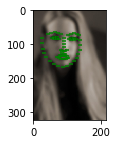

1 (500, 333, 3) (68, 2)


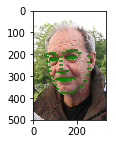

2 (250, 258, 3) (68, 2)


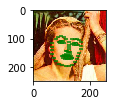

3 (434, 290, 3) (68, 2)


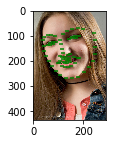

4 (828, 630, 3) (68, 2)


ValueError: num must be 1 <= num <= 4, not 5

<Figure size 432x288 with 0 Axes>

In [25]:
for i in range(len(face_dataset)):
    sample = face_dataset[i]
    print(i, sample['image'].shape, sample['landmarks'].shape)
    ax = plt.subplot(1,4, i+1)
    show_landmarks(**sample)